## Initial setup
This notebook has the analysis validation of the third regime using changes on base prices from different technologies.


In [2]:

'''
By Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 2 March 2021

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob
from matplotlib.pyplot import figure
from matplotlib.legend_handler import HandlerLine2D
import statistics
import matplotlib.patches as mpatches

includePlots = True

C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



## Load the results
These results are a tuple of one data frame with the changes on each input variable, and a dictionary with the outputs. 

In [3]:
from ema_workbench import load_results

#results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_EET3Regime2021-Mar-01.tar.gz')
#results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL-HypoPast-2021-Jan-20.tar.gz')
results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL2021-Feb-03.tar.gz')


In [4]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

In [5]:
experiments.describe()

,annualCpi,annualInflation,consumption,domesticConsumptionPercentage,energyEfficiency,generationRolloutPeriod,generatorRetirement,importPriceFactor,includePublicallyAnnouncedGen,learningCurve,...,priceChangePercentageBrownCoal,priceChangePercentageOcgt,priceChangePercentageWater,priceChangePercentageWind,rooftopPV,scheduleMinCapMarketGen,semiScheduleGenSpotMarket,semiScheduleMinCapMarketGen,solarUptake,wholesaleTariffContribution
count,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,...,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000
mean,3.000238,2.998810,1.999048,34.990000,1.000714,5.497143,-0.001429,-0.007143,0.500000,7.497143,...,-0.018333,0.006190,0.005000,0.000714,5.999524,150.541905,8.998333,150.370476,2.001429,27.503810
std,1.415313,1.415313,1.414556,8.939456,0.816645,2.872126,3.161913,29.152702,0.500002,4.609583,...,29.153567,29.154507,29.151743,29.152674,0.816208,86.593375,0.816061,86.599359,1.414892,10.387143
min,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,-5.000000,-50.000000,0.000000,0.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,5.000000,1.000000,8.000000,1.000000,0.000000,10.000000
25%,2.000000,2.000000,1.000000,27.000000,0.000000,3.000000,-3.000000,-25.000000,0.000000,3.750000,...,-25.000000,-25.000000,-25.000000,-25.000000,5.000000,75.750000,8.000000,75.750000,1.000000,18.750000
50%,3.000000,3.000000,2.000000,35.000000,1.000000,5.500000,0.000000,0.000000,0.500000,7.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,150.500000,9.000000,150.500000,2.000000,27.500000
75%,4.000000,4.000000,3.000000,43.000000,2.000000,8.000000,3.000000,25.000000,1.000000,11.250000,...,25.000000,25.000000,25.000000,25.000000,7.000000,225.250000,10.000000,225.250000,3.000000,36.250000
max,5.000000,5.000000,4.000000,50.000000,2.000000,10.000000,5.000000,50.000000,1.000000,15.000000,...,50.000000,50.000000,50.000000,50.000000,7.000000,300.000000,10.000000,300.000000,4.000000,45.000000


In [6]:
outcomes_to_show = ['consumptionYear', 'tariffsYear', 'wholesalePriceYear', 'GHGYear', 
                    'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
                    'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
                    'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
                    'secondaryMaxUnmetDemandMwhPerHour']

# 23 levers/uncertainties selected after EET (last test July 2020)
# 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 1999
startYearShift = (startYear - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
time = outcomes['TIMEYear'][0, startYearShift:]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest = [21,31,41,51]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [7]:
## Aggregate household data
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3

"""Overwrite GHG with the data of interest"""
outcomes_filtered[ooi] = data_GHG_total

In [8]:
#Subset of levers/uncertainties
#selected_levers = list(['rooftopPV', 'annualCpi','capacityFactorChangeBrownCoal','capacityFactorChangeWater','semiScheduleMinCapMarketGen'])    
selected_uncertainties = uncertainties

ooi = 'GHGYear'

data = outcomes_filtered[ooi]


num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

## Envelopes

### GHGE

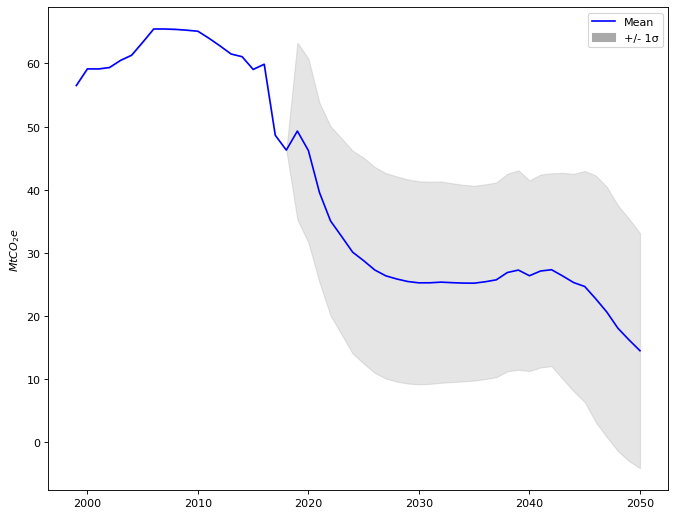

In [9]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
ghgeSTD = np.std(outcomes_filtered['GHGYear'],axis=0)
ghge2STD = 2*np.std(outcomes_filtered['GHGYear'],axis=0)

ghgeMean = np.mean(outcomes_filtered['GHGYear'],axis=0)

#PLOT MEAN
lineMean, = plt.plot(time,ghgeMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
plt.fill_between(x=time,y1=ghgeMean - ghgeSTD, y2=ghgeMean + ghgeSTD, color='gray', alpha=0.2)
#plt.fill_between(x=time,y1=ghgeMean - ghge2STD, y2=ghgeMean + ghge2STD,color='darkgray', alpha=0.2)


#lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')


#PLOT legend, and title

#plt.legend(handles=[lineMean,darkgrey_patch,lightgrey_patch])
plt.legend(handles=[lineMean,darkgrey_patch])

axes = plt.gca()
#axes.set_ylim([0,120])
ylabel = axes.set_ylabel('$MtCO_2e$')
#plt.suptitle("{}".format(ooi), fontsize=15)

Densities (PDF): {'18.1 to 25.9': '0.007', '25.9 to 33.7': '0.021', '33.7 to 41.5': '0.025', '41.5 to 49.2': '0.025', '49.2 to 57.0': '0.021', '57.0 to 64.8': '0.013', '64.8 to 72.5': '0.009', '72.5 to 80.3': '0.005', '80.3 to 88.1': '0.002'}
% in Bin: {'10.4 to 18.1': '0.3%', '18.1 to 25.9': '5.8%', '25.9 to 33.7': '16.1%', '33.7 to 41.5': '19.5%', '41.5 to 49.2': '19.7%', '49.2 to 57.0': '16.2%', '57.0 to 64.8': '10.5%', '64.8 to 72.5': '6.6%', '72.5 to 80.3': '3.8%', '80.3 to 88.1': '1.4%', '88.1 to 95.8': '0.3%'}

Densities (PDF): {'0.1 to 8.8': '0.022', '8.8 to 17.5': '0.013', '17.5 to 26.2': '0.025', '26.2 to 34.8': '0.025', '34.8 to 43.5': '0.017', '43.5 to 52.2': '0.008', '52.2 to 60.9': '0.003', '60.9 to 69.6': '0.002'}
% in Bin: {'0.1 to 8.8': '19.5%', '8.8 to 17.5': '10.9%', '17.5 to 26.2': '21.4%', '26.2 to 34.8': '21.9%', '34.8 to 43.5': '14.5%', '43.5 to 52.2': '6.8%', '52.2 to 60.9': '2.9%', '60.9 to 69.6': '1.3%', '69.6 to 78.3': '0.5%', '78.3 to 87.0': '0.3%', '87.0 to

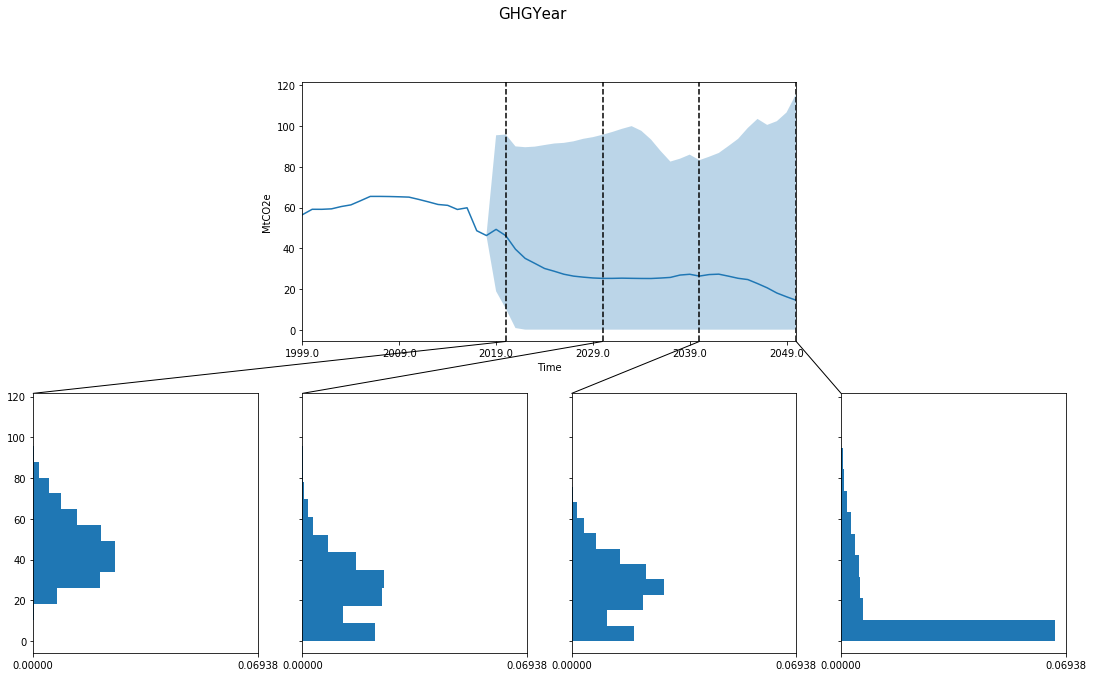

In [10]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, density = Density.HIST, grouping_specifiers=None,
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,100)])

# #Add BAU in the plot with a red line
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-')

# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][63738], 'y-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][27332], 'k-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][25713], 'm-')

 
# ax_env[ooi]['main plot'].plot(historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e'].values, 'g--')



## Add historic figures
ax_env

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)
#plt.legend()

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


### Wholesale prices (primary market)

In [11]:
# Subset Sobol levers
#selected_levers = list(['rooftopPV','annualCpi', 'generationRolloutPeriod', 'generatorRetirement','capacityFactorChangeBrownCoal','semiScheduleMinCapMarketGen'])    

select_uncertainties = uncertainties
ooi = 'wholesalePriceYear'

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, select_uncertainties] 



Text(0, 0.5, '$\\MWh')

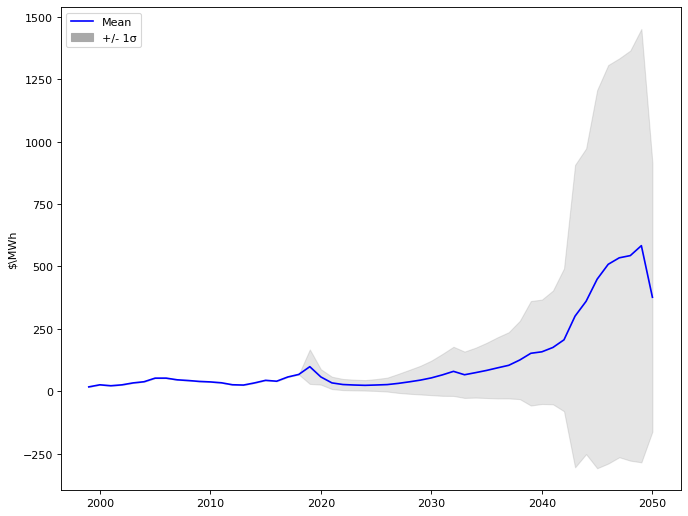

In [12]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
wholesaleSTD = np.std(outcomes_filtered['wholesalePriceYear'],axis=0)
wholesale2STD = 2*np.std(outcomes_filtered['wholesalePriceYear'],axis=0)

wholesaleMean = np.mean(outcomes_filtered['wholesalePriceYear'],axis=0)
wholesaleNominal = outcomes_filtered[ooi][-1]

#PLOT MEAN
lineMean, = plt.plot(time, wholesaleMean, 'b-', label = 'Mean')

#PLOT STD
plt.fill_between(x=time, y1=wholesaleMean - wholesaleSTD, y2=wholesaleMean + wholesaleSTD, color='gray', alpha=0.2)
#plt.fill_between(x=time, y1=wholesaleMean - wholesale2STD, y2=wholesaleMean + wholesale2STD,color='darkgray', alpha=0.2)



#lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
#plt.legend(handles=[lineMean,darkgrey_patch,lightgrey_patch],loc='upper left')
plt.legend(handles=[lineMean,darkgrey_patch],loc='upper left')
plt.ylabel('$\MWh')

#plt.suptitle("{}".format(ooi), fontsize=15)

Densities (PDF): {'5.7 to 27.2': '0.007', '27.2 to 48.7': '0.014', '48.7 to 70.2': '0.012', '70.2 to 91.7': '0.007', '91.7 to 113.2': '0.004', '113.2 to 134.8': '0.002'}
% in Bin: {'5.7 to 27.2': '15.9%', '27.2 to 48.7': '29.6%', '48.7 to 70.2': '24.9%', '70.2 to 91.7': '16.0%', '91.7 to 113.2': '8.0%', '113.2 to 134.8': '3.4%', '134.8 to 156.3': '1.7%', '156.3 to 177.8': '0.4%', '177.8 to 199.3': '0.1%', '199.3 to 220.8': '0.0%', '220.8 to 242.3': '0.0%'}

Densities (PDF): {'0.0 to 93.5': '0.009', '93.5 to 187.1': '0.001'}
% in Bin: {'0.0 to 93.5': '82.6%', '93.5 to 187.1': '12.7%', '187.1 to 280.6': '2.9%', '280.6 to 374.2': '1.1%', '374.2 to 467.7': '0.5%', '467.7 to 561.3': '0.2%', '561.3 to 654.8': '0.0%', '654.8 to 748.4': '0.0%', '748.4 to 841.9': '0.0%', '841.9 to 935.5': '0.0%', '935.5 to 1029.0': '0.0%'}

Densities (PDF): {'0.0 to 200.2': '0.004'}
% in Bin: {'0.0 to 200.2': '78.9%', '200.2 to 400.3': '10.6%', '400.3 to 600.5': '5.3%', '600.5 to 800.6': '2.8%', '800.6 to 1000.

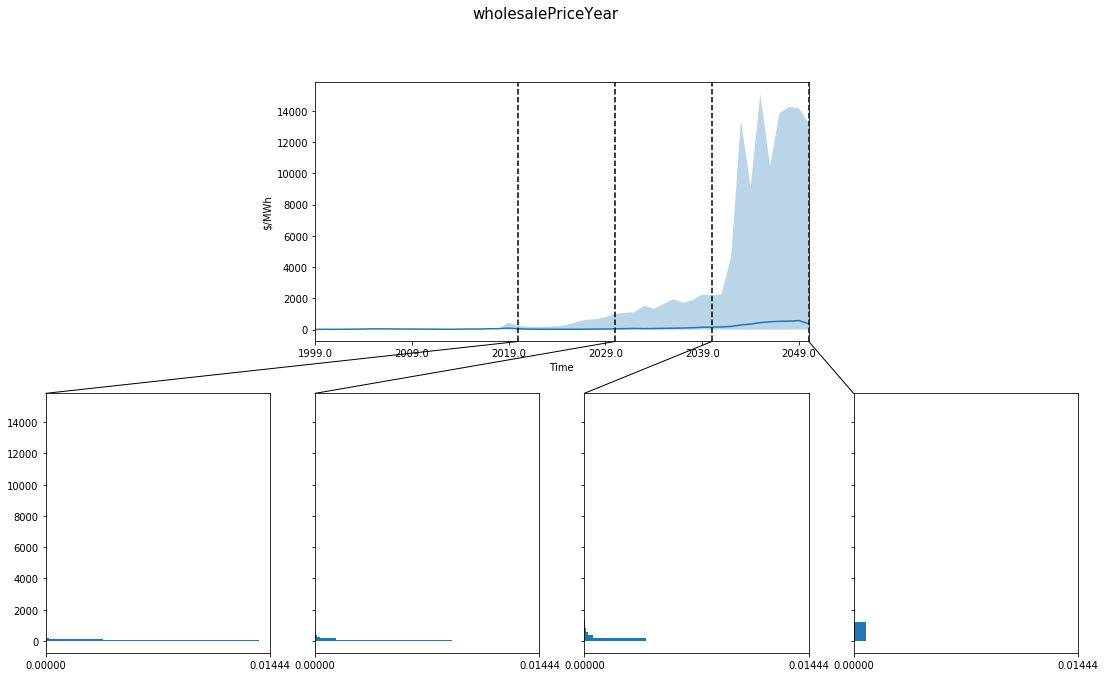

In [13]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,100)])


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


### Tariffs

In [14]:
# Subset Sool levers/uncertainties
selected_uncertainties = uncertainties

#selected_levers = levers
ooi = 'tariffsYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

Text(0, 0.5, '$c/kWh$')

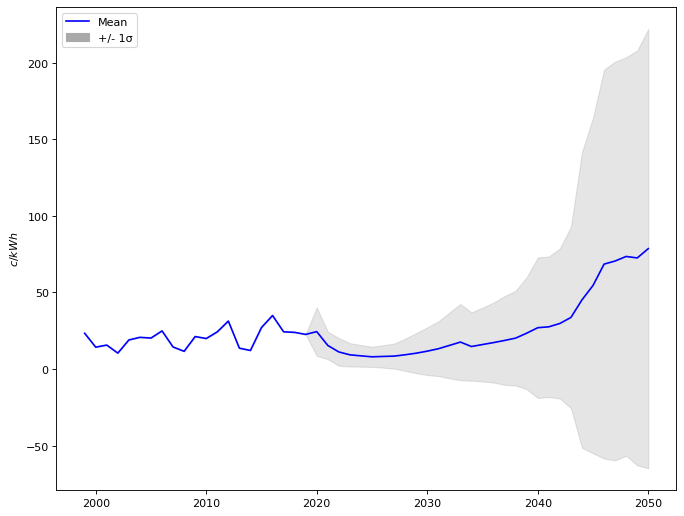

In [15]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
tariffsSTD = np.std(outcomes_filtered['tariffsYear'],axis=0)
tariffs2STD = 2*np.std(outcomes_filtered['tariffsYear'],axis=0)


tariffsMean = np.mean(outcomes_filtered['tariffsYear'],axis=0)

#PLOT MEAN
lineMean, = plt.plot(time, tariffsMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
plt.fill_between(x=time, y1=tariffsMean - tariffsSTD, y2=tariffsMean + tariffsSTD,color='gray', alpha=0.2,label='+/- 2\u03C3')
#plt.fill_between(x=time, y1=tariffsMean - tariffs2STD, y2=tariffsMean + tariffs2STD,color='darkgray', alpha=0.2,label='+/- 1\u03C3')


#PLOT legend, and title
#plt.legend(handles=[lineMean,darkgrey_patch,lightgrey_patch],loc='upper left')
plt.legend(handles=[lineMean,darkgrey_patch],loc='upper left')
plt.ylabel('$c/kWh$')

#plt.suptitle("{}".format(ooi), fontsize=15)

Densities (PDF): {'2.8 to 12.5': '0.030', '12.5 to 22.3': '0.025', '22.3 to 32.0': '0.019', '32.0 to 41.7': '0.014', '41.7 to 51.4': '0.008', '51.4 to 61.1': '0.004', '61.1 to 70.9': '0.002', '70.9 to 80.6': '0.001'}
% in Bin: {'2.8 to 12.5': '29.2%', '12.5 to 22.3': '24.0%', '22.3 to 32.0': '18.9%', '32.0 to 41.7': '13.4%', '41.7 to 51.4': '7.8%', '51.4 to 61.1': '3.7%', '61.1 to 70.9': '2.0%', '70.9 to 80.6': '0.9%', '80.6 to 90.3': '0.2%', '90.3 to 100.0': '0.1%', '100.0 to 109.8': '0.0%'}

Densities (PDF): {'0.8 to 40.8': '0.024'}
% in Bin: {'0.8 to 40.8': '96.0%', '40.8 to 80.8': '3.2%', '80.8 to 120.9': '0.5%', '120.9 to 160.9': '0.2%', '160.9 to 200.9': '0.1%', '200.9 to 241.0': '0.1%', '241.0 to 281.0': '0.0%', '281.0 to 321.1': '0.0%', '321.1 to 361.1': '0.0%', '361.1 to 401.1': '0.0%', '401.1 to 441.2': '0.0%'}

Densities (PDF): {'0.6 to 113.4': '0.008'}
% in Bin: {'0.6 to 113.4': '95.8%', '113.4 to 226.2': '3.1%', '226.2 to 339.1': '0.8%', '339.1 to 451.9': '0.2%', '451.9 to

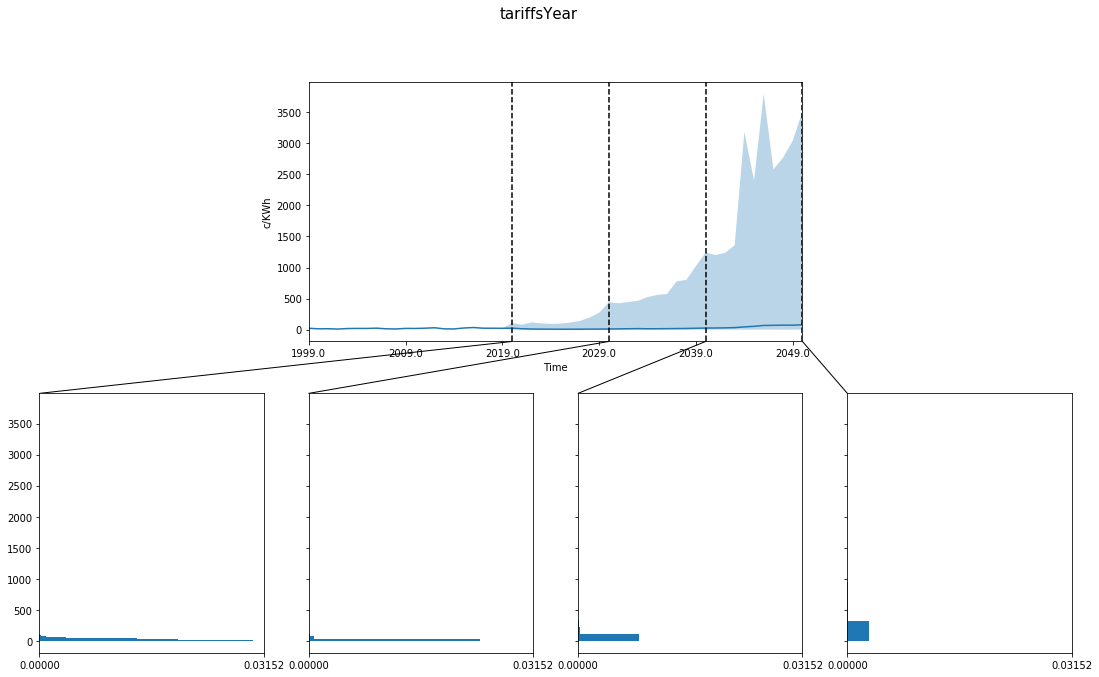

In [16]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,100)])

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


### Renewable energy in the System

In [17]:
## Historic renewables in the system (from OpenNem data)

In [18]:
ooi = 'renewableContributionYear'

Text(0, 0.5, '% RE')

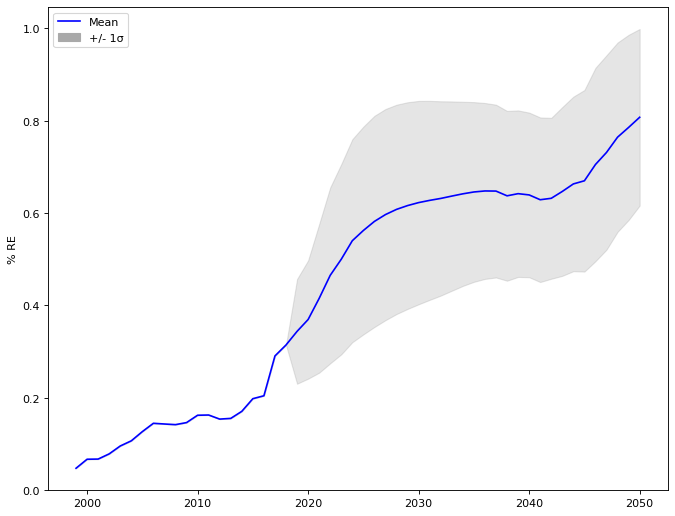

In [19]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
reSTD = np.std(outcomes_filtered['renewableContributionYear'],axis=0)
re2STD = 2*np.std(outcomes_filtered['renewableContributionYear'],axis=0)

reMean = np.mean(outcomes_filtered['renewableContributionYear'],axis=0)


#PLOT MEAN
lineMean, = plt.plot(time,reMean, 'b-', label = 'Mean')

#PLOT STD
plt.fill_between(x=time,y1=reMean - reSTD, y2=reMean + reSTD,color='gray', alpha=0.2)
#plt.fill_between(x=time,y1=reMean - re2STD, y2=reMean + re2STD,color='darkgray', alpha=0.2)


lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
#plt.legend(handles=[lineMean,darkgrey_patch,lightgrey_patch], loc = 'upper left')
plt.legend(handles=[lineMean,darkgrey_patch], loc = 'upper left')

plt.ylabel('% RE')

#plt.suptitle("{}".format(ooi), fontsize=15)

Densities (PDF): {'0.0 to 0.1': '0.316', '0.1 to 0.2': '0.804', '0.2 to 0.2': '1.397', '0.2 to 0.3': '2.254', '0.3 to 0.4': '2.715', '0.4 to 0.4': '2.762', '0.4 to 0.5': '2.448', '0.5 to 0.6': '1.488', '0.6 to 0.6': '0.495', '0.6 to 0.7': '0.065', '0.7 to 0.8': '0.020'}
% in Bin: {'0.0 to 0.1': '2.1%', '0.1 to 0.2': '5.4%', '0.2 to 0.2': '9.5%', '0.2 to 0.3': '15.3%', '0.3 to 0.4': '18.4%', '0.4 to 0.4': '18.7%', '0.4 to 0.5': '16.6%', '0.5 to 0.6': '10.1%', '0.6 to 0.6': '3.4%', '0.6 to 0.7': '0.4%', '0.7 to 0.8': '0.1%'}

Densities (PDF): {'0.0 to 0.1': '0.043', '0.1 to 0.2': '0.148', '0.2 to 0.3': '0.335', '0.3 to 0.4': '0.714', '0.4 to 0.5': '1.297', '0.5 to 0.5': '1.980', '0.5 to 0.6': '1.840', '0.6 to 0.7': '1.424', '0.7 to 0.8': '0.856', '0.8 to 0.9': '0.598', '0.9 to 1.0': '1.813'}
% in Bin: {'0.0 to 0.1': '0.4%', '0.1 to 0.2': '1.3%', '0.2 to 0.3': '3.0%', '0.3 to 0.4': '6.5%', '0.4 to 0.5': '11.7%', '0.5 to 0.5': '17.9%', '0.5 to 0.6': '16.7%', '0.6 to 0.7': '12.9%', '0.7 to 

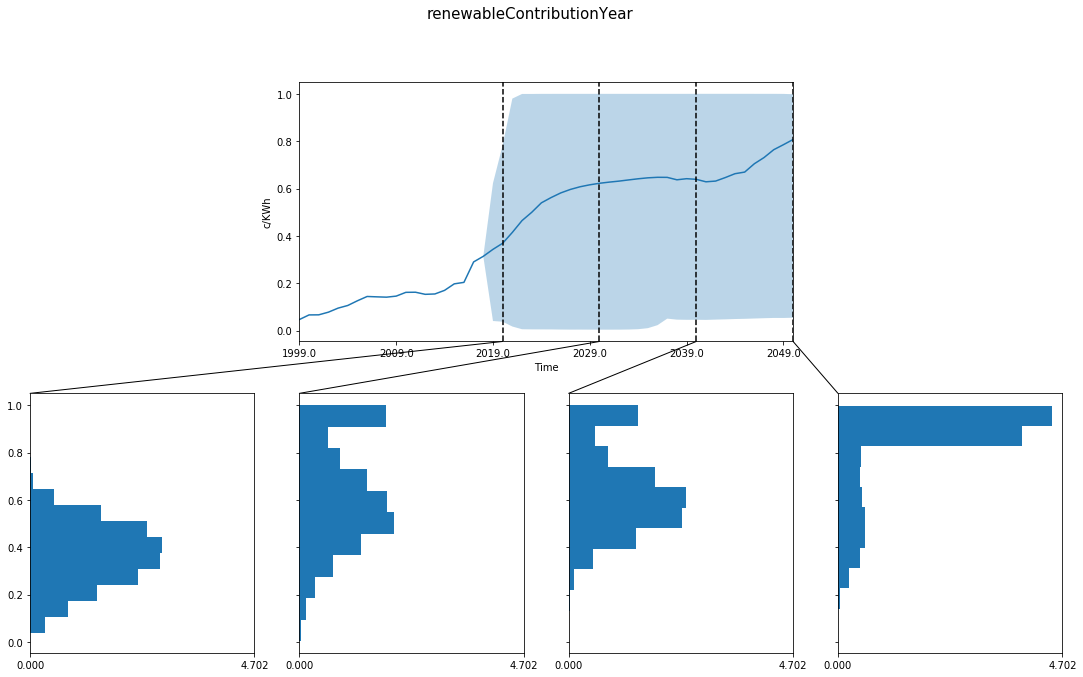

In [20]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,100)])

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')
